In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student_performances.csv to student_performances (1).csv


# In this tutorial you are given a task of classifying students grades bases on various properties of the students and their families. The students can have 5 kinds of grades - Excellent, Very good, Good, Satisfactory, and poor.

# You need to develop different classifiers and determine which one of them give best performaces on various metrices.

# Import Libraries.
## I have imported few new libraries for this week  but you need to import rest of them.

In [3]:

# Your code to import all the relevant libraries.

from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



# Read and display dataset.

In [4]:
# Your code to read data

# Your code to print first few samples of the dataset.
dataset=pd.read_csv("Student_Performances.csv")
dataset.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grades
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,6,poor
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,4,poor
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,10,satisfactory
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,2,very good
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,4,satisfactory


# Print the information about the dataset.

## You need to convert all the object datatypes (except output variable - grades) to the numbers using either labelencoding or one hot encoding.

In [5]:
# Your code to print the key information about the datset. Use - .info method.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15  famsup      395 non-null    object
 16  paid        395 non-null    object
 17  activities  395 non-null    object
 18  nursery     395 non-null    object
 19  higher      395 non-null    object
 20  internet  

# Converting the columns  ['Fjob', 'Mjob', 'reason', 'guardian'] into one hot vectors.

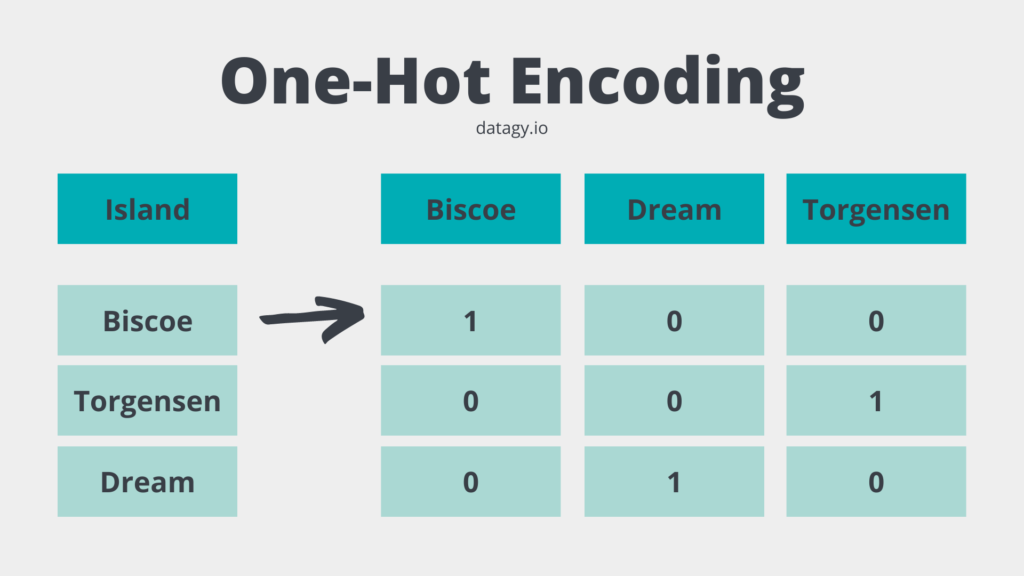

In [6]:
data = pd.get_dummies(dataset, columns = ['Fjob', 'Mjob', 'reason', 'guardian'])


# Note that you can also use sklearn.preprocessing.OneHotEncoder instead of pd.get_dummies.

# Next, print the first few rows of the data (dataset have been stored in data in previous cell).

In [7]:
# Your code to print first few rows of the data.
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,F,18,U,GT3,A,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,F,17,U,GT3,T,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,F,15,U,LE3,T,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,F,15,U,GT3,T,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,F,16,U,GT3,T,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0


# Converting other text values in the dataframe to numbers using label encoding.

In [8]:

labelencoder = LabelEncoder()

labelencoder.fit(data['sex'])
data ['sex'] = labelencoder.transform(data['sex'])

#
## Your code to convert transform address to the numbers
#
labelencoder.fit(data['address'])
data ['address'] = labelencoder.transform(data['address'])

#
## Your code to convert transform famsize to the numbers
#
labelencoder.fit(data['famsize'])
data ['famsize'] = labelencoder.transform(data['famsize'])

#
## Your code to convert transform Pstatus to the numbers
#
labelencoder.fit(data['Pstatus'])
data ['Pstatus'] = labelencoder.transform(data['Pstatus'])


#
## Your code to convert transform schoolsup to the numbers
#
labelencoder.fit(data['schoolsup'])
data ['schoolsup'] = labelencoder.transform(data['schoolsup'])


#
## Your code to convert transform famsup to the numbers
#
labelencoder.fit(data['famsup'])
data ['famsup'] = labelencoder.transform(data['famsup'])

#
## Your code to convert transform paid to the numbers
#
labelencoder.fit(data['paid'])
data ['paid'] = labelencoder.transform(data['paid'])


#
## Your code to convert transform activities to the numbers
#
labelencoder.fit(data['activities'])
data ['activities'] = labelencoder.transform(data['activities'])


#
## Your code to convert transform nursery to the numbers
#
labelencoder.fit(data['nursery'])
data ['nursery'] = labelencoder.transform(data['nursery'])


#
## Your code to convert transform higher to the numbers
#
labelencoder.fit(data['higher'])
data ['higher'] = labelencoder.transform(data['higher'])


#
## Your code to convert transform internet to the numbers
#
labelencoder.fit(data['internet'])
data ['internet'] = labelencoder.transform(data['internet'])

#
## Your code to convert transform romantic to the numbers
#
labelencoder.fit(data['romantic'])
data ['romantic'] = labelencoder.transform(data['romantic'])


In [9]:
columns_to_encode1 = ['sex', 'address','famsize','Pstatus','schoolsup','famsup', 'paid','activities','nursery','higher', 'internet', 'romantic']
labelencoder = LabelEncoder()
for column in columns_to_encode1:
    labelencoder.fit(data[column])
    data[column] = labelencoder.transform(data[column])

# Is their an efficient way to do this? Could you use loops. Try to convert it into an efficient code and replace with the above code?


# Next - Print few samples of the data to ensure everything is number except 'grades' column.

In [10]:
# Your code to print first few samples of the data.
data.head(5)

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0


In [11]:
# Your code to print information on the samples of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                395 non-null    int64 
 1   age                395 non-null    int64 
 2   address            395 non-null    int64 
 3   famsize            395 non-null    int64 
 4   Pstatus            395 non-null    int64 
 5   Medu               395 non-null    int64 
 6   Fedu               395 non-null    int64 
 7   traveltime         395 non-null    int64 
 8   studytime          395 non-null    int64 
 9   failures           395 non-null    int64 
 10  schoolsup          395 non-null    int64 
 11  famsup             395 non-null    int64 
 12  paid               395 non-null    int64 
 13  activities         395 non-null    int64 
 14  nursery            395 non-null    int64 
 15  higher             395 non-null    int64 
 16  internet           395 non-null    int64 
 1

# Separate input X and output y.

## X is the all columns except 'grades'.
## y is 'grades' column.

In [12]:
# Your code to get X from data
# Your code to get y from data
x = data.drop('grades', axis =1).values
data['grades'].value_counts()
labelencoder.fit(data['grades'])
data['grades'] = labelencoder.transform(data['grades'])
data['grades'].value_counts()
y= data['grades'].values


# Print shapes of X and y to make sure everything is good

In [13]:
# Print shape of X
# Print shape of y
# Print X
# Print y
print(x.shape)
print(y.shape)
print (x)
print (y)

(395, 42)
(395,)
[[ 0 18  1 ...  0  1  0]
 [ 0 17  1 ...  1  0  0]
 [ 0 15  1 ...  0  1  0]
 ...
 [ 1 21  0 ...  0  0  1]
 [ 1 18  0 ...  0  1  0]
 [ 1 19  1 ...  1  0  0]]
[2 2 3 4 3 4 3 2 0 4 2 1 4 3 0 4 4 3 2 3 4 4 0 1 2 2 3 4 3 3 1 0 0 1 4 2 0
 4 3 1 3 1 0 3 2 2 3 0 4 2 1 1 3 3 1 3 4 4 2 0 3 3 2 2 3 4 1 2 2 0 4 3 2 4
 3 3 3 3 3 2 1 3 2 4 3 2 2 4 3 2 2 0 2 3 4 3 4 3 4 2 2 0 4 2 0 3 2 0 1 0 0
 3 1 0 2 0 4 1 2 1 4 4 1 1 2 1 3 2 2 0 2 2 1 3 2 2 2 2 1 4 2 2 3 1 2 3 2 3
 2 3 2 4 3 2 1 2 1 3 4 1 2 2 2 3 2 1 3 0 2 4 2 0 3 2 2 2 3 2 2 3 2 1 0 2 1
 3 3 4 2 3 1 2 2 3 4 4 0 3 0 3 0 3 3 2 3 2 2 1 3 2 2 1 4 2 3 4 2 2 2 3 2 2
 0 1 4 2 4 1 2 1 4 3 2 1 2 3 1 1 3 2 1 1 2 1 2 0 1 2 2 4 2 3 2 2 1 2 1 3 4
 2 0 2 1 2 2 0 3 3 3 2 2 4 3 4 3 1 2 2 2 3 2 3 1 3 3 3 0 1 4 4 3 4 1 0 4 3
 2 2 4 0 3 3 4 0 1 1 0 2 1 3 2 1 3 3 1 3 2 2 3 3 1 2 3 4 4 3 0 3 2 4 2 4 2
 2 2 4 1 2 0 3 3 2 4 2 3 4 0 2 4 1 2 1 2 2 3 2 1 3 3 0 1 1 3 4 1 3 1 2 3 3
 2 1 3 2 0 3 4 3 4 3 4 2 3 2 2 3 2 2 2 2 2 0 2 3 2]


# Next  - Split data into train and test set.

In [14]:
# Your code to split data into train and test set.
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size =0.5, random_state = 25)


#
#
# Print shapes of train and test data to make sure everyhing is in order.
#
#
print (x_train.shape)
print (x_test.shape)

print (y_train.shape)
print (y_test.shape)

(197, 42)
(198, 42)
(197,)
(198,)


# Next - Develop a SVM classifier and fit into the train dataset.

In [16]:
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC()

# Next - prdict the values on the input test set.

# Find accuracy, precision, recall, f-score.

In [18]:
y_pred = classifier.predict(x_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))

print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))

print (classification_report(y_test, y_pred))

Accuracy test set:  0.2727272727272727
None
Precision test set:  0.2727272727272727
None
Recall test set:  0.2727272727272727
None
F-score test set:  0.2727272727272727
None
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        35
           2       0.31      0.56      0.40        68
           3       0.21      0.33      0.26        48
           4       0.00      0.00      0.00        34

    accuracy                           0.27       198
   macro avg       0.10      0.18      0.13       198
weighted avg       0.16      0.27      0.20       198



C:\Users\odhes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\odhes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\odhes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Find accuracy, precision, recall, and f-score on training dataset.

In [19]:
train_data_predictions = classifier.predict(x_train)

print (print("Accuracy train set: ", accuracy_score(y_train, train_data_predictions)))
print (print("Precision train set: ", precision_score(y_train, train_data_predictions, average = 'micro' )))
print (print("Recall train set: ", recall_score(y_train, train_data_predictions, average = 'micro' )))
print (print("F-score train set: ", f1_score(y_train, train_data_predictions, average = 'micro' )))

print (classification_report(y_train, train_data_predictions))

Accuracy train set:  0.3756345177664975
None
Precision train set:  0.3756345177664975
None
Recall train set:  0.3756345177664975
None
F-score train set:  0.3756345177664975
None
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        27
           2       0.37      0.65      0.47        62
           3       0.38      0.62      0.47        55
           4       0.00      0.00      0.00        26

    accuracy                           0.38       197
   macro avg       0.15      0.25      0.19       197
weighted avg       0.22      0.38      0.28       197



C:\Users\odhes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\odhes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\odhes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Display confusion matrix between actual and predicted values on the test data.

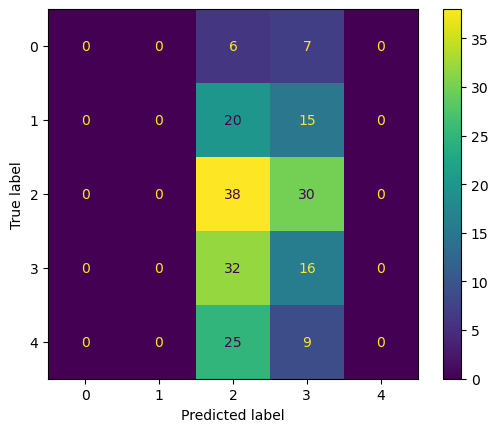

In [20]:
#
# Your code to display confusion matrix between predicted output and actual output
#
#
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()

# Earlier, we used rfb Kernel. Now, we will test other kernels too.

# We will test on ['linear', 'poly', 'rbf', 'sigmoid' ] kernels.

In [22]:
# Create a list kernels with values ['linear', 'poly', 'rbf', 'sigmoid' ]
# Create an empty list accuracy


  #
  #
  # Your code to compare the classifier for different Kernesls
  #
  #

#
# Your code to plot accuracy vs kernels
#
Kern = ['linear', 'poly','rbf','sigmoid']
accuracy =[]
for kernel in Kern:
    # Your code to compare the classifier for different Kernesls
    classifier = SVC(kernel = kernel)
    classifier.fit(x_train, y_train)
    test_pred = classifier.predict(x_test)
    test_score = accuracy_score(y_test, test_pred)
    accuracy.append(test_score)

In [23]:
accuracy

[0.35353535353535354,
 0.2878787878787879,
 0.2727272727272727,
 0.3282828282828283]

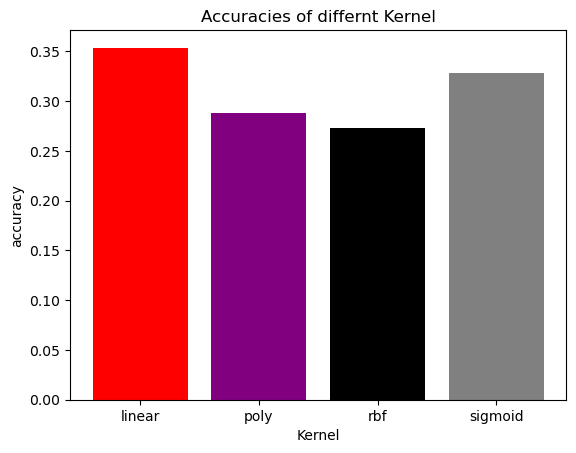

In [26]:
# Your code to plot accuracy vs kernels
Kernel = ['linear', 'poly','rbf','sigmoid']
plt.bar(Kern,accuracy, color = ['Red', 'purple', 'black', 'Grey'])
plt.xlabel('Kernel')
plt.ylabel ('accuracy')
plt.title('Accuracies of differnt Kernel')
plt.show()

In [27]:
# rbf has the best accuracy

# Which Kernel function is giving you best accuracy?

# Next - Develop KNN and Losgistic regression classifiers for this dataset.

In [28]:
#
# Develop KNN-based classifier. Use number of neigbours of your choice
#
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [29]:
train_scores = []

# Your code to create an empty list test_scores

test_scores = []


neighbours = [1, 2, 3, 4, 5,]

In [30]:
#
# Develop KNN-based classifier. Use number of neigbours of your choice
#
neighbors = [1, 2, 3, 4, 5, 6] 
#neighbors = np.arange(1, 11)
print(neighbors)

for neighbor in neighbors:
    # Create a knn classifier object for particular neigbour value.
    knn = KNeighborsClassifier(n_neighbors= neighbor)
    
    # Fit the classifier on X_train, y_train
    knn.fit(x_train, y_train)
    
    # Make predictions on train data.  Store the values in train_pred variable.
    train_pred = knn.predict(x_train)
    
    # Make predictions on test data.  Store the values in test_pred variable.
    test_pred = knn.predict(x_test)
    
    # Find accuracy for train data. Hint - use accuracy_score method in sklearn.
    train_score = accuracy_score(y_train, train_pred)
    
    # Find accuracy for test data. Hint - use accuracy_score method in sklearn.
    test_score = accuracy_score(y_test, test_pred)
    
    # Append training accuracy in list train_scores.
    train_scores.append(train_score)
    
    # Append test accuracy in list test-scores.
    test_scores.append(test_score)


[1, 2, 3, 4, 5, 6]


In [31]:
print (knn.score(x_train, y_train))
print (knn.score(x_test, y_test))

0.5583756345177665
0.2777777777777778


# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on test data.

In [32]:
#
#
# Your code to evaluate the classifer on test data
#
#
print (classification_report(y_test, y_pred))

print("Validation Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        35
           2       0.31      0.56      0.40        68
           3       0.21      0.33      0.26        48
           4       0.00      0.00      0.00        34

    accuracy                           0.27       198
   macro avg       0.10      0.18      0.13       198
weighted avg       0.16      0.27      0.20       198

Validation Accuracy:  0.2727272727272727


C:\Users\odhes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\odhes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\odhes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on train data.



In [33]:
#
#
# Your code to evaluate the classifer on train data
#
#
train_pred = knn.predict(x_train)


# Display confusion matric between predicted and actual values.

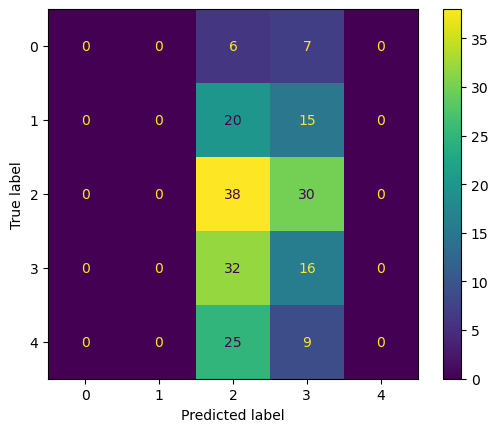

In [34]:
#
#
# Your code to display confusion matrix
#
#
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)

disp.plot()
plt.show()

# Develop Logistic Regression-based classifier.

In [36]:
#
# Your code to develop logistic regression-based classifier
#
logisticRegression =  LogisticRegression(random_state = 1)

logisticRegression.fit(x_train, y_train)

C:\Users\odhes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [37]:
y_pred = logisticRegression.predict(x_test)

print (y_pred)

[3 3 0 1 1 3 0 2 2 3 4 3 4 2 2 2 1 4 0 2 2 2 3 2 1 3 0 2 4 3 4 4 2 3 4 1 4
 2 3 1 2 3 4 2 2 2 4 3 3 3 0 2 3 3 2 4 2 0 2 0 2 2 1 4 3 4 3 2 4 3 3 1 2 3
 3 3 3 3 0 3 3 3 2 2 1 1 3 3 3 2 3 2 1 2 2 4 2 3 3 3 4 1 3 2 2 4 3 4 3 3 3
 1 1 4 3 4 2 2 2 3 3 2 4 2 0 3 3 4 2 2 1 3 2 0 2 2 2 2 4 3 0 3 4 2 3 2 3 2
 4 2 3 1 4 4 2 3 3 2 3 3 2 2 2 1 3 3 1 0 3 3 1 3 2 4 0 3 2 4 4 3 2 4 3 3 2
 2 3 2 2 3 2 3 2 3 4 4 3 4]


In [38]:
print (logisticRegression.score(x_train, y_train))
print (logisticRegression.score(x_test, y_test))

0.6548223350253807
0.35353535353535354


# Evaluate Logistic Regression for accuracy, precision, recall, f-score, and classification report on test data.

In [39]:
#
#
#
# Your code to evaluate the logistic regression classifier on test data
#
#
#
print (classification_report(y_test, y_pred))

print("Validation Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.23      0.23        13
           1       0.26      0.14      0.19        35
           2       0.57      0.53      0.55        68
           3       0.28      0.40      0.32        48
           4       0.21      0.21      0.21        34

    accuracy                           0.35       198
   macro avg       0.31      0.30      0.30       198
weighted avg       0.36      0.35      0.35       198

Validation Accuracy:  0.35353535353535354


# Evaluate Logistic regression for accuracy, precision, recall, f-score, and classification report on train data.

In [40]:
#
#
#
# Your code to evaluate the logistic regression classifier on train data
#
#
#
print (classification_report(y_test, y_pred))

print("Validation Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.23      0.23        13
           1       0.26      0.14      0.19        35
           2       0.57      0.53      0.55        68
           3       0.28      0.40      0.32        48
           4       0.21      0.21      0.21        34

    accuracy                           0.35       198
   macro avg       0.31      0.30      0.30       198
weighted avg       0.36      0.35      0.35       198

Validation Accuracy:  0.35353535353535354


# Display confusion matrix between predicted and actual values for logistic regression.

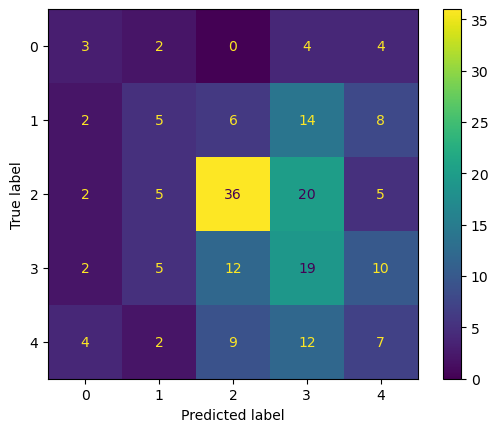

In [41]:
#
# Your code to display confusion matrix for logistic regression
#
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)

disp.plot()
plt.show()

Next, compare the accuracy, precision, recall, and F-score for all the classifiers using plots. You need to have only one plot rather than 4 different plots for 4 different meteruces.

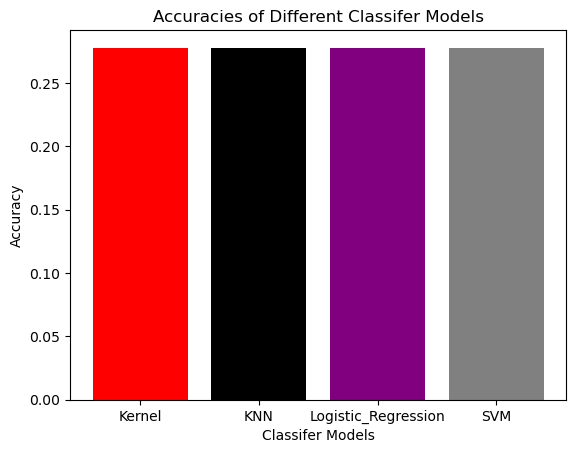

In [42]:
#
#
# Your code to plot and compare the performance of different algorithms
#
#
models = "Kernel", "KNN","Logistic_Regression", "SVM"
plt.title('Accuracies of Different Сlassifer Models') 

plt.bar(models, test_score, color = ['Red', 'Black', 'purple', 'Grey'])

plt.xlabel('Сlassifer Models')
plt.ylabel('Accuracy')

plt.show()


### **Important - Document in your Lab Logbook**

# 1.   Include a plot comparing the performance of various algorithms.
# 2.    Specify the best-performing algorithm and indicate which category exhibits the best and least performance based on the confusion metrics.

